* [deploy on jetson](https://docs.ultralytics.com/yolov5/tutorials/running_on_jetson_nano/#install-pytorch-and-torchvision)

In [125]:

# dependency
!pip3.10 install -r requirements.txt
# Make sure torch versions are compatible

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/rich/console.py", line 1283, in render
    renderable = rich_cast(renderable)
 

In [126]:

import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import pandas as pd


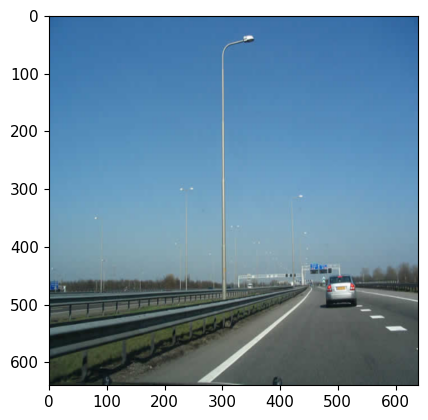

In [127]:
def cvtGray(im):
    return cv2.cvtColor(cv2.cvtColor(im,cv2.COLOR_RGB2GRAY),cv2.COLOR_GRAY2RGB)
cap = cv2.VideoCapture(-1)

image = cap.read()

cap.release()

image = cv2.imread("lantaarnpaal.jpg")
#plt.imshow(image)
rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


rgb = cv2.resize(rgb,(640,640))
plt.imshow(rgb)



(1, 3, 640, 640)

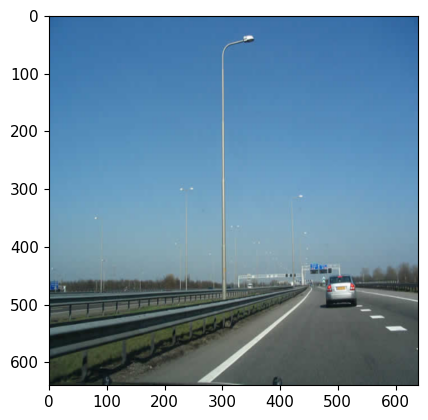

In [128]:
net = cv2.dnn.readNetFromONNX("model/640_Detection_Finalized_Model.onnx")
blob = cv2.dnn.blobFromImage(rgb, 1/255,  (640, 640), [0,0,0], 1, crop=False)
display(blob.shape)
net.setInput(blob)






plt.imshow(rgb)


Using cache found in /home/nick/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-10-26 Python-3.10.12 torch-1.13.0+cu117 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
image 1/1: 640x640 1 Lightpost
Speed: 2.7ms pre-process, 177.6ms inference, 0.7ms NMS per image at shape (1, 3, 640, 640)


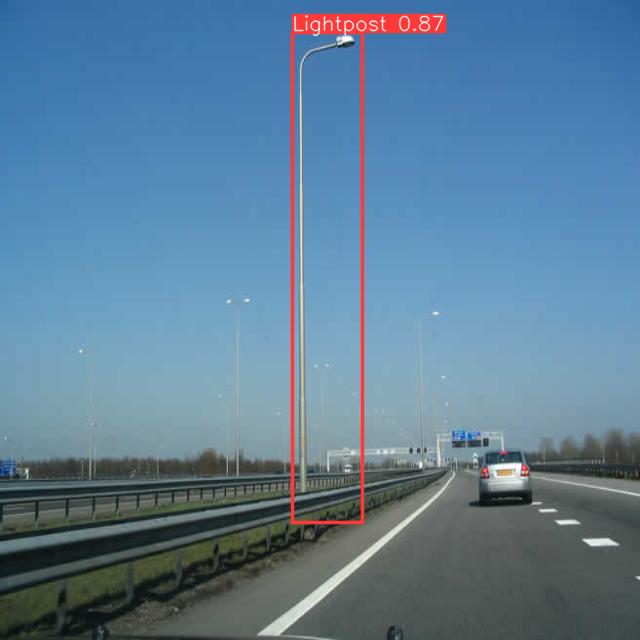

image 1/1: 492x657 1 Lightpost
Speed: 3.1ms pre-process, 110.3ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)


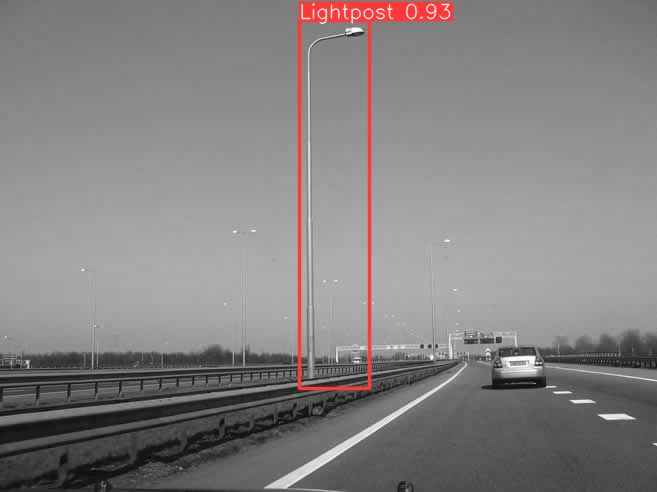

image 1/1: 266x474 2 Lightposts
Speed: 2.5ms pre-process, 93.9ms inference, 0.8ms NMS per image at shape (1, 3, 384, 640)


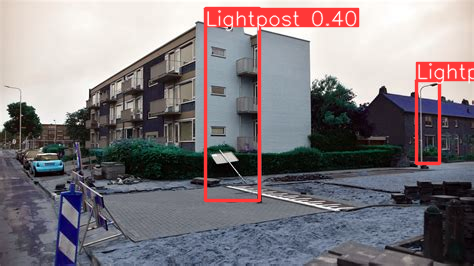

image 1/1: 266x474 2 Lightposts
Speed: 2.3ms pre-process, 89.0ms inference, 0.8ms NMS per image at shape (1, 3, 384, 640)


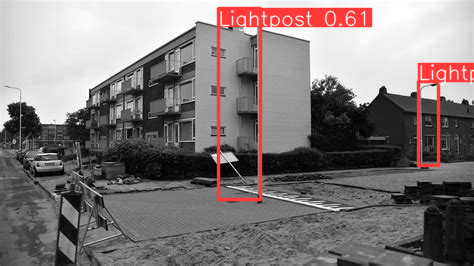

In [129]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', "model/Lightposts_DetectionModel_imgsz640_Final.pt")


results = model(rgb)
results.print()
results.show()

results = model(cvtGray(image))
results.print()
results.show()

results = model(cv2.imread("im.jpg"))
results.print()
results.show()


results = model(cvtGray(cv2.imread("im.jpg")))
results.print()
results.show()

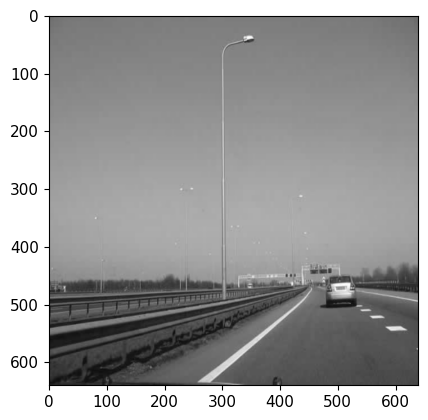

In [130]:
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
gray = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)

gray = cv2.resize(gray,(640,640))
plt.imshow(gray)



In [131]:
cap = cv2.VideoCapture("./out.mp4")
while not cap.isOpened():
    cap = cv2.VideoCapture("./out.mp4")
    cv2.waitKey(1000)
pos_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
while True:
    flag, frame = cap.read()
    if flag:
        # The frame is ready and already captured
        # model(cv2.resize(frame,(640,640))).show()
        pos_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
        
    else:
        # The next frame is not ready, so we try to read it again
        cap.set(cv2.CAP_PROP_POS_FRAMES, pos_frame-1)

        # It is better to wait for a while for the next frame to be ready
        cv2.waitKey(1000)

    if cv2.waitKey(10) == 27:
        break
    if cap.get(cv2.CAP_PROP_POS_FRAMES) == cap.get(cv2.CAP_PROP_FRAME_COUNT):
        # If the number of captured frames is equal to the total number of frames,
        # we stop
        break
cap.release()
cv2.destroyAllWindows() 

In [135]:
from ultralytics import YOLO

model = YOLO("model/Lightposts_DetectionModel_imgsz640_Final.pt")
model.track("out.mp4", show=True)


TypeError: BaseModel.fuse() got an unexpected keyword argument 'verbose'